# Classify MNIST Digits using LeNet

**Objective**: Classify MNIST digits using LeNet

## About MNIST
    * MNIST dataset is available from SciKit datasets library
    * 70K samples
    * Each sample is of 28x28, ie., 784 pixels

## About LeNet
 * Latest Convolutional Neural Network designed for Handwritten and OCR applications.
 * [For Demo, Architecture, Publications, Visit Yann Lecun website ](http://yann.lecun.com/exdb/lenet/)
 * 2 sets of Conv -> Rely -> Pool layers
 * INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC (output)

## Define LeNet

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using Theano backend.


In [2]:
# definition of LeNet
def le_net(width, height, depth, num_classes):
    #
    model = Sequential()
    inputShape = (height, width, depth)
    
    # first set of Conv -> Relu -> Pool layers
    filters = 20
    kernel_size = (3,3)
    pad = 'same'
    
    model.add(Conv2D(filters, kernel_size, padding=pad, input_shape= inputShape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # second set of Conv -> Relu -> Pool layers
    model.add(Conv2D(50, kernel_size, padding=pad))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    
    # before connecting to fully connected network, we have to flatten it.
    model.add(Flatten())
    # only set of FC -> Relu layer
    model.add(Dense(500))
    model.add(Activation('relu'))
    
    # output layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    # return the le net architecure
    return model

## Read MNIST dataset

In [3]:
from sklearn import datasets
import numpy as np

In [4]:
print('Numpy: ', np.__version__)

Numpy:  1.14.2


In [5]:
mnist = datasets.fetch_mldata('MNIST Original')

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
type(mnist)

sklearn.utils.Bunch

In [7]:
mnist.COL_NAMES

['label', 'data']

In [8]:
len(mnist.target)

70000

In [9]:
mnist.data.shape

(70000, 784)

In [10]:
data = mnist.data

In [11]:
data.shape

(70000, 784)

In [12]:
?data.reshape

In [13]:
data = data.reshape(data.shape[0], 28, 28, 1)

In [14]:
data.shape

(70000, 28, 28, 1)

In [15]:
#print(data[0])

## Build Model

### Split train / test data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# scale the data in the range [0, 1] and split data 75:25 

(trainX, testX, trainY, testY) = train_test_split(data / 255.0, 
                                                  mnist.target.astype('int'),
                                                  test_size=0.25,
                                                  random_state=123)


In [18]:
## convert the labels into vectors
from sklearn.preprocessing import LabelBinarizer

In [19]:
le = LabelBinarizer()
trainY = le.fit_transform(trainY)
testY  = le.transform(testY)

In [20]:
print(trainY[1:3])
print(testY[1:3])

[[0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]]
[[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]]


## Compile the model

In [21]:
from keras.optimizers import SGD

In [22]:
sgd = SGD(lr=0.01)

model = le_net(28, 28, 1, num_classes=10)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        9050      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
__________

In [24]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Train the network

In [25]:
# train the network
H = model.fit(trainX, trainY, validation_data=(testX, testY),  epochs=20, batch_size=128, verbose=1)

Train on 52500 samples, validate on 17500 samples
Epoch 1/20
52500/52500 [==============================] - 58s 1ms/step - loss: 1.0804 - acc: 0.7345 - val_loss: 0.4834 - val_acc: 0.8451
Epoch 2/20
52500/52500 [==============================] - 58s 1ms/step - loss: 0.3107 - acc: 0.9058 - val_loss: 0.5533 - val_acc: 0.8243
Epoch 3/20
52500/52500 [==============================] - 99s 2ms/step - loss: 0.2310 - acc: 0.9305 - val_loss: 0.2896 - val_acc: 0.9113
Epoch 4/20
52500/52500 [==============================] - 60s 1ms/step - loss: 0.1853 - acc: 0.9444 - val_loss: 0.2224 - val_acc: 0.9299
Epoch 5/20
52500/52500 [==============================] - 61s 1ms/step - loss: 0.1522 - acc: 0.9540 - val_loss: 0.1434 - val_acc: 0.9570
Epoch 6/20
52500/52500 [==============================] - 61s 1ms/step - loss: 0.1318 - acc: 0.9602 - val_loss: 0.1602 - val_acc: 0.9462
Epoch 7/20
52500/52500 [==============================] - 61s 1ms/step - loss: 0.1127 - acc: 0.9665 - val_loss: 0.1601 - val_acc

## Evaluate the model

In [27]:
pred = model.predict(testX, batch_size=128)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(testY.argmax(axis=1), pred.argmax(axis=1), target_names=[str(x) for x in le.classes_]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1730
           1       0.99      0.99      0.99      1973
           2       0.98      0.99      0.98      1720
           3       0.98      0.97      0.98      1848
           4       0.98      0.99      0.98      1692
           5       0.99      0.96      0.98      1577
           6       0.97      0.99      0.98      1715
           7       0.98      0.98      0.98      1824
           8       0.97      0.96      0.97      1712
           9       0.97      0.97      0.97      1709

   micro avg       0.98      0.98      0.98     17500
   macro avg       0.98      0.98      0.98     17500
weighted avg       0.98      0.98      0.98     17500



In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(testY.argmax(axis=1), pred.argmax(axis=1)))

0.9805714285714285


## Plot the accuracy

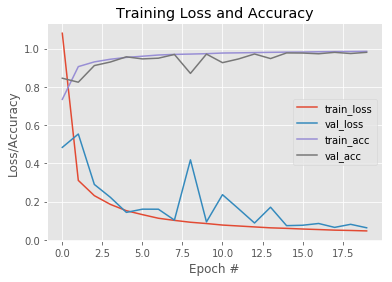

In [32]:
import matplotlib.pyplot as plt

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('mnist_LeNet_accuracy.png')
plt.show()

In [33]:
# save the model
model.save('mnist_LeNet.hdf5')